# Intuition behind Convolution in Image Processing

## - No Maths
## - All illustrations
## - Python code for each operation
## - Corresponding vendor code also shown (eg numpy packages, scipy packages,etc)



I am a beginner to deep learning and CNN. <br>
Like any other beginners to deep learning, i started with the classic example of using an artificial neural network on MNIST database. While this particular use case had challenges of its own, i found nothing more excruciating than the use case of image classification using Convolutional Neural Network.<br>

Most blogs/papers/youtube videos/paid tutorials would simply explain what is a convolution, how convolution is performed and its impact or worse, extreme mathematical terms (i went down a rabbit hole of maths upto fourier transform :( ). <br>

I could not, for the life of me, understand the intuition behind convolution in image processing. BY that i mean, how is it that the matrix for edge detectors actually detect edge. Why do they detect edges and nothing else? <br>

And a direct impact of the above confusion was i could not come up with the kernels for operations such as blur,sharpen on my own. <br>

After week of searching intensely, reading intensely i came up with an understanding of convolution in image processing. I am hoping this will come in handy for others as well. And heck, will serve as a reference guide for me too when needed in the future

#### Steps 

###### demonstrate in illustration how convolution is done
###### show the python code for each operation
###### develop an intuition for convolutions so as to come up with kernels on own
###### references i have used 

![1](image/1.png)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![2](image/2.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![3](image/3.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![4](image/4.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![5](image/5.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![6](image/6.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![7](image/7.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![8](image/8.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![9](image/9.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![10](image/10.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![11](image/11.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![112](image/121.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

![13](image/13.PNG)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------





To reiterate the steps in performing an image convolution

1. take the pixel representation of the original image

2. decide on a kernel matrix and flip it horizontally as well as vertically

3. perform padding on the original matrix.

4. decide on a slide

5. calculate the output image matrix based on the dimensions in 1,2,3 and 4.

6. slide the kernel on the original image and calculate the weighted sum to get the output image


<br>

###### We will now take a look at the python code for each of these operations. We would compare our python code with the already available methods in industry accepted packages such as numpy , scipy, etc

<br>

In [1]:
## lets first create an utility method that would compare two matrices element by element
## this is required since we would be comparing our custom method with industry accepted methods

#### NOTE: we could very well have used (A==B).all(). however this only works if A,B are numpy arrays

def compare(m1,m2):

    flag = False

    if m1.shape == m2.shape:

        for i,j in enumerate(m1):
            
            check_all = list(set(filter(lambda x :True if x else False,[i==k for i,k in zip(j,m2[i])])))

            if check_all and len(check_all)==1 and check_all[0]:

                continue
            
            else:
                return flag

        flag = True
    
    return flag

##### Flip a matrix horizontally and vertically

In [2]:
## we will first flip horizontally and then vertically
import numpy as np

m = np.array([

    [5, 2, 3],
    [1, 1, 11],
    [3, 4, 55]

])

m

array([[ 5,  2,  3],
       [ 1,  1, 11],
       [ 3,  4, 55]])

In [3]:

## lets take an example of only the first row. and see if we can rotate that particular array horizontally
## once we do that, we will extend this to entire array
a = m[0]

print(a[:: ]) ## :: give the entire array

## now to rotate this, we give the negative index to rotate
print(a[::-1])

## now that this has worked, lets extend this to entire matrix

m[:,::-1]

[5 2 3]
[3 2 5]


array([[ 3,  2,  5],
       [11,  1,  1],
       [55,  4,  3]])

In [4]:

def flip_horizontally(matrix):
    return matrix[:, ::-1]

##lets test

flip_horizontally(m)

array([[ 3,  2,  5],
       [11,  1,  1],
       [55,  4,  3]])

In [5]:
## lets assert using industry level method to achieve the same

compare(flip_horizontally(m),np.fliplr(m))

True

In [6]:

## lets take an example of only the first column. and see if we can rotate that particular array vertically
## once we do that, we will extend this to entire array
a = m[:, 0]

print(a,a[::-1]) ## :: give the entire array
print(m)
m[ ::-1]

[5 1 3] [3 1 5]
[[ 5  2  3]
 [ 1  1 11]
 [ 3  4 55]]


array([[ 3,  4, 55],
       [ 1,  1, 11],
       [ 5,  2,  3]])

In [7]:
def flip_vertically(matrix):
    return matrix[::-1]

## lets test

compare(flip_vertically(m),np.flipud(m))

## we can see that they are the same

True

In [8]:
## lets bring this all together.
compare(flip_vertically(flip_horizontally(m)), np.flipud(np.fliplr(m)))


True

<br><br>

##### Lets create a method to apply convolution on a pixel representation of an image

###### input would be the original image matrix, kernel matrix , stride value

In [9]:
## lets first see how we can get weighted sum of two matrix

a = np.array([[1,2,3],[4,5,6]])

k = np.array([[10,10,10],[10,10,10]])

## we are expecting a value of 1*10+2*10+3*10+4*10+5*10+6*10
sum = 0
for i, j in enumerate(a):
    
    for a, b in zip(j, k[i]):
        sum = sum + a*b
        
print(sum)

def weighted_sum(matrix_one, matrix_two):
    sum = 0
    
    for i, j in enumerate(matrix_one):    
        for a, b in zip(j, matrix_two[i]):
            sum = sum + a*b
            
    return sum
        
    

210


In [10]:
m = np.array([[2,1,2],[5,0,1],[1,7,3]])
w = np.array([[0.5,0.7, 0.4],[0.3,0.4, 0.1],[0.5, 1, 0.5]])
w = flip_vertically(flip_horizontally(w))
print(w)

dim_image = m.shape
dim_kernel = w.shape
stride = 1

from math import floor 

dim_kernel_center = (floor((dim_kernel[0]- 1 )/2),floor((dim_kernel[1]- 1 )/2))

padding_dim = dim_kernel_center

## pad m with padding_dim[0] number of zeros row wise on top and below, 
## and padding_dim[1] number of zeros column wise left and right


## we find the dimensions of the padded matrix
new_dim = (padding_dim[0]*2 + dim_image[0], padding_dim[1]*2 + dim_image[1])



new_m = np.zeros((new_dim))
print(padding_dim, dim_image)
new_m[padding_dim[0] : padding_dim[0]+ dim_image[0], padding_dim[1] : padding_dim[1]+dim_image[1]] = m
new_m

[[0.5 1.  0.5]
 [0.1 0.4 0.3]
 [0.4 0.7 0.5]]
(1, 1) (3, 3)


array([[0., 0., 0., 0., 0.],
       [0., 2., 1., 2., 0.],
       [0., 5., 0., 1., 0.],
       [0., 1., 7., 3., 0.],
       [0., 0., 0., 0., 0.]])

In [11]:
## lets recreate the above code and put it into a reusable method

def pad_zeros(matrix, pad_dim):
    """
    pad_dim needs to be a sequence of two length. 
    
    """
    
    existing_dim =  matrix.shape
    
    new_dim = (pad_dim[0]*2 + existing_dim[0], pad_dim[1]*2 + existing_dim[1])
    
    new_matrix = np.zeros(new_dim)
    
    new_matrix[pad_dim[0]: pad_dim[0]+ existing_dim[0], pad_dim[1]: pad_dim[1]+ existing_dim[1]] = matrix
    
    return new_matrix


## lets test

t1 = np.array([[2,1,2],[5,0,1],[1,7,3]])
t2 = np.array([[0.5,0.7, 0.4],[0.3,0.4, 0.1],[0.5, 1, 0.5]])
t3 = np.array([[1,2,3,4], [11,22,33,44]])

print(t1, '\n padded: \n',pad_zeros(t1, (1,1)))

print(t2, '\n padded: \n',pad_zeros(t2, (1,1)))

print(t2, '\n padded: \n',pad_zeros(t2, (2,2)))

print(t3, '\n padded: \n',pad_zeros(t3, (1,1)))

[[2 1 2]
 [5 0 1]
 [1 7 3]] 
 padded: 
 [[0. 0. 0. 0. 0.]
 [0. 2. 1. 2. 0.]
 [0. 5. 0. 1. 0.]
 [0. 1. 7. 3. 0.]
 [0. 0. 0. 0. 0.]]
[[0.5 0.7 0.4]
 [0.3 0.4 0.1]
 [0.5 1.  0.5]] 
 padded: 
 [[0.  0.  0.  0.  0. ]
 [0.  0.5 0.7 0.4 0. ]
 [0.  0.3 0.4 0.1 0. ]
 [0.  0.5 1.  0.5 0. ]
 [0.  0.  0.  0.  0. ]]
[[0.5 0.7 0.4]
 [0.3 0.4 0.1]
 [0.5 1.  0.5]] 
 padded: 
 [[0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.7 0.4 0.  0. ]
 [0.  0.  0.3 0.4 0.1 0.  0. ]
 [0.  0.  0.5 1.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]]
[[ 1  2  3  4]
 [11 22 33 44]] 
 padded: 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  0.]
 [ 0. 11. 22. 33. 44.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [12]:
from math import ceil

m = np.array([[2,1,2],[5,0,1],[1,7,3]])
w = np.array([[0.5,0.7, 0.4],[0.3,0.4, 0.1],[0.5, 1, 0.5]])
w = flip_vertically(flip_horizontally(w))
print(m,w)

dim_image = m.shape
dim_kernel = w.shape
stride = 1

from math import floor 

dim_kernel_center = (floor((dim_kernel[0]- 1 )/2),floor((dim_kernel[1]- 1 )/2))

padding_dim = dim_kernel_center

## we find the dimensions of the padded matrix
new_dim = (padding_dim[0]*2 + dim_image[0], padding_dim[1]*2 + dim_image[1])

number_of_movements_column_wise = ceil(dim_kernel[1]/stride)
number_of_movements_row_wise = ceil(dim_kernel[0]/stride)

dim_output_matrix = (floor((dim_image[0] + 2* padding_dim[0] - dim_kernel[0])/stride) +1, \
                        floor((dim_image[1] + 2* padding_dim[1] - dim_kernel[1])/stride)+1)


output_matrix = np.zeros(dim_output_matrix)
padded_matrix = pad_zeros(m, padding_dim)
print(number_of_movements_column_wise, number_of_movements_row_wise, dim_output_matrix)


for r in range(dim_output_matrix[0]):
    
    for c in range(dim_output_matrix[1]):
        
        for s in range(stride):
            output_matrix[r,c] = weighted_sum(m[r:dim_kernel[0], c + s: dim_kernel[1] + s], w)
        

output_matrix
        
        

[[2 1 2]
 [5 0 1]
 [1 7 3]] [[0.5 1.  0.5]
 [0.1 0.4 0.3]
 [0.4 0.7 0.5]]
3 3 (3, 3)


array([[10.6,  7.8,  2.3],
       [ 6.8,  2.9,  0.8],
       [ 9. ,  6.5,  1.5]])

In [13]:
def convolution(image, kernel, stride = 1):
    
    w = flip_vertically(flip_horizontally(kernel))

    dim_image = image.shape
    dim_kernel = w.shape
    stride = 1

    dim_kernel_center = (floor((dim_kernel[0]- 1 )/2),floor((dim_kernel[1]- 1 )/2))

    padding_dim = dim_kernel_center

    ## we find the dimensions of the padded matrix
    new_dim = (padding_dim[0]*2 + dim_image[0], padding_dim[1]*2 + dim_image[1])

    dim_output_matrix = (floor((dim_image[0] + 2* padding_dim[0] - dim_kernel[0])/stride) +1, \
                            floor((dim_image[1] + 2* padding_dim[1] - dim_kernel[1])/stride)+1)


    output_matrix = np.zeros(dim_output_matrix) 
    padded_matrix = pad_zeros(image, padding_dim)

    rstep = 0
    for r in range(dim_output_matrix[0]):

        step = 0
        for c in range(dim_output_matrix[1]):

            output_matrix[r,c] = weighted_sum(padded_matrix[ rstep:dim_kernel[0]+ rstep , step : dim_kernel[1] + step ], w)
            step = step+stride

        rstep = rstep + stride

    return output_matrix

m = np.array([[2,1,2],[5, 0, 1],[1,7,3]])
w = np.array([[0.5, 0.7, 0.4],[0.3,0.4,0.1],[0.5,1,0.5]])

convolution(m, w)


array([[ 4.6,  3.7,  1.6],
       [ 8.7, 10.6,  7.8],
       [ 7.5,  6.8,  2.9]])

In [14]:

##lets this our method out against scipy.signal convolve methods
from scipy.signal import convolve2d

m = np.array([[1,1,1],[2,2,2],[3,3,3]])
w = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
print(compare(convolution(m, w), convolve2d(m,w,mode='same')))


m = np.array([[0.5,0.3,0.2],[2,2,2],[-3,0.2,1.2]])
w = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
print(compare(convolution(m, w), convolve2d(m,w,mode='same')))


m = np.random.rand(10,10)
w = np.array([[0,-1,2,-1,0],[0,-1,2,-1,0],[0,-1,2,-1,0],[0,-1,2,-1,0],[0,-1,2,-1,0]])

print(compare(convolution(m, w),convolve2d(m,w,mode='same')))

## we can see that our values are the same across all. hence we have succesfully convolved

True
True
True


<br>

#### Before we proceed further lets reiterate our custom functions vs industry accepted methods for convolution operations

![14](image/14.PNG)

<br><br>

#### Lets see if we can develop the intuition for convolution on image processing

![15](image/15.PNG)

![16](image/16.PNG)

![17](image/17.PNG)

![18](image/18.PNG)

![19](image/19.PNG)

![20](image/20.PNG)

![21](image/21.PNG)

![22](image/22.PNG)

![23](image/23.PNG)

![24](image/24.PNG)

![25](image/25.PNG)

![26](image/26.PNG)

<br><br>

### Lets write python code for the above operations and proof our conclusions

In [15]:
from skimage import io, viewer

import numpy as np
from matplotlib import pyplot as plot
from scipy.signal import convolve2d


C:\Users\somak\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


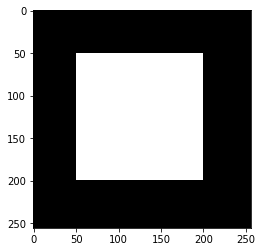

In [16]:
## lets draw a rough square 256*256 pixel

square = np.zeros((256,256))
##this square is completely dark box
square[50:200, 50:200] = 1


plot.imshow(square, cmap = plot.cm.gray)

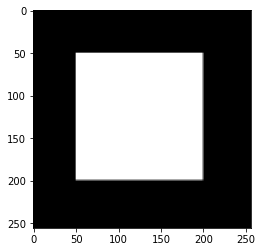

In [17]:
## lets define our kernels one by one 


blur_kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

plot.imshow(convolve2d(square, blur_kernel, mode='same'), cmap = plot.cm.gray)

## since this is a white nd black image, impact of blurring may not be clear immediately


## however take a look at the bottom right edges. it is clear that color white is bleeding into the black background
## whereas in our original image, the boundaries where very clearly defined


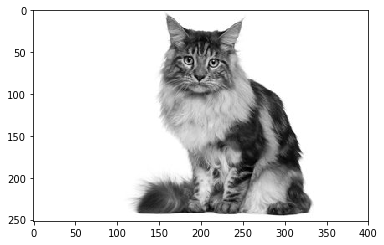

In [18]:
## as promised, lets see what happens when we take weird combinations of the kernel. where the weights are not
## proportionately distributed
img = io.imread('image\\cat_black_nd_white.jpg', as_grey=True)

plot.imshow(img, cmap = plot.cm.gray)



Text(0.5,1,'Blurred Image')

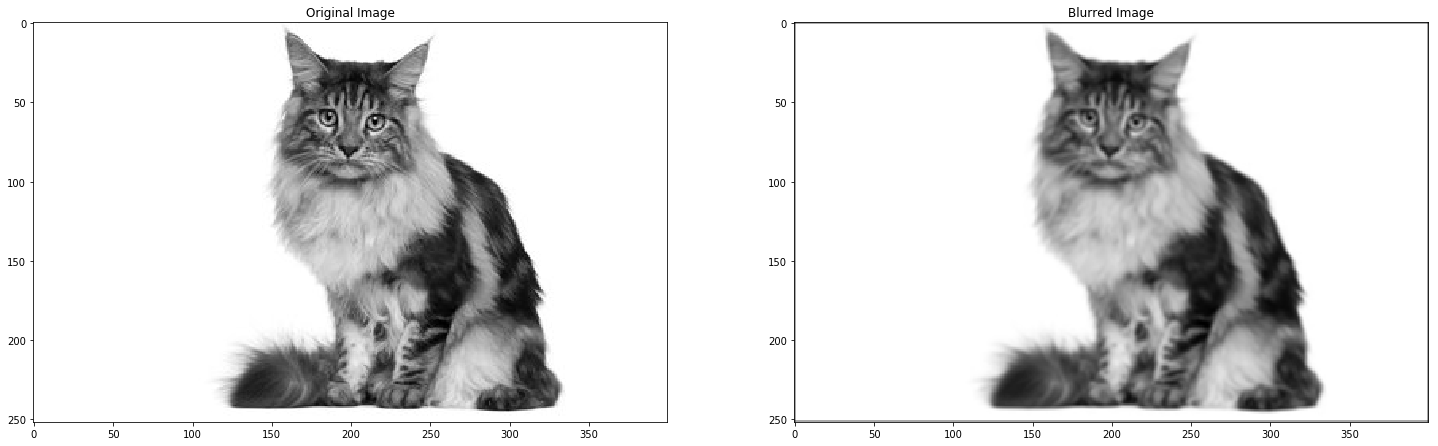

In [19]:
blur_kernel_weights = (1/9) * np.array([[1,1,1],[1,1,1],[1,1,1]])

fig, ax = plot.subplots(1,2, figsize= (25,45))
ax[0].imshow(img, cmap = plot.cm.gray)
ax[1].imshow(convolve2d(img, blur_kernel_weights, mode = 'same'), cmap = plot.cm.gray)
ax[0].set_title('Original Image')
ax[1].set_title('Blurred Image')

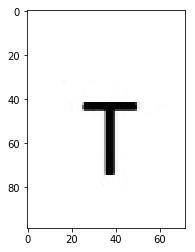

In [27]:

## lets work on vertical edge detectors

img = io.imread('image\\small_t.jpg', as_grey=True)

plot.imshow(img,cmap=plot.cm.gray)


Text(0.5,1,'Vertical Edge Detected')

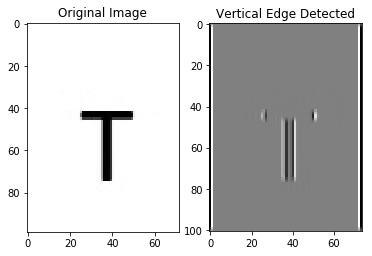

In [32]:
vertical_edge_kernel = np.array([[-4,8,-4],[-4,8,-4],[-4,8,-4]])

## could be same as [-1,2,-1] or any multiples there of

fig , ax = plot.subplots(1,2)

ax[0].imshow(img, cmap=plot.cm.gray)
ax[1].imshow(convolve2d(img, vertical_edge_kernel), cmap=plot.cm.gray)
ax[0].set_title('Original Image')
ax[1].set_title('Vertical Edge Detected')

<br><br>



##### I hope you found this useful. I cannot end without acknowledging help i got from many folks and their blogs. All of them are listed below



### http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

### https://cs.stackexchange.com/questions/3215/intuition-for-convolution-in-image-processing?rq=1

### http://www.aishack.in/tutorials/image-convolution-examples/

### https://www.youtube.com/watch?v=C_zFhWdM4ic&t=278s



### best playground : http://setosa.io/ev/image-kernels/